# Making blobs

In [1]:
import scipy as sp
import porespy as ps
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()
sp.random.seed(10)

The ``blobs`` function works by generating an image of random noise then applying a Gaussian blur.  The creates a correleated field with a Gaussian distribution.  The function will then normalize the values back to a uniform distribution, which allow direct thresholding of the image to obtain a binary images (i.e. solid and void).  

Let's start by illustrating the correlated noise field returned by the function.  It's possible to create directional correlation by specifying the ``blobiness`` argument as an array with a different value in each direction, as follows:

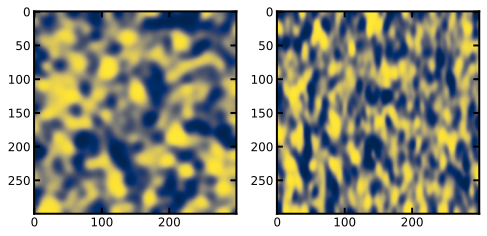

In [2]:
im1 = ps.generators.blobs(shape=[300, 300], porosity=None, blobiness=[1, 1])
im2 = ps.generators.blobs(shape=[300, 300], porosity=None, blobiness=[1, 2])
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(im1)
ax[1].imshow(im2);

The distribution of the values in these images has been renormalized to be a uniform distribution, which can be confirmed by plotting a histogram.  Because the image is not very large, the histogram is not perfectdly flat, and there are some artifacts near the ends, but overall it's sufficiently uniform to perform 

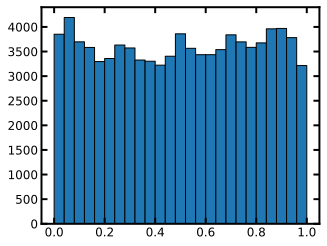

In [3]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.hist(im1.flatten(), bins=25, edgecolor="k");

Next is easy to threshold the noise field to produce a binary image of 'solid' and 'void':

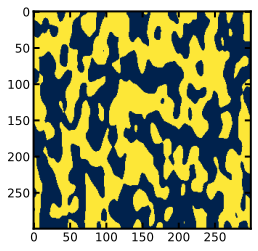

In [4]:
im = im2 < 0.5
fig, ax = plt.subplots()
ax.imshow(im);

And we can check the porosity of the thresholded image:

In [5]:
p = im.sum() / im.size
print(f"The porosity is: {p:.3}")

The porosity is: 0.494


Which is reasonably close to the 50% value the threshold was set at.  

It's also possible to receive an already thresholded image from the function directly by specifying the porosity argument:

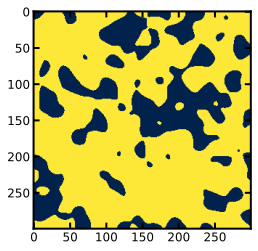

In [6]:
im = ps.generators.blobs(shape=[300, 300], porosity=0.7)
fig, ax = plt.subplots()
ax.imshow(im);

In [7]:
print(f"The porosity is: {im.sum()/im.size:.3}")

The porosity is: 0.707


Finally, it's possible to change the size of the structure by adjusting the ``blobiness`` where larger values means more blobs in the image:

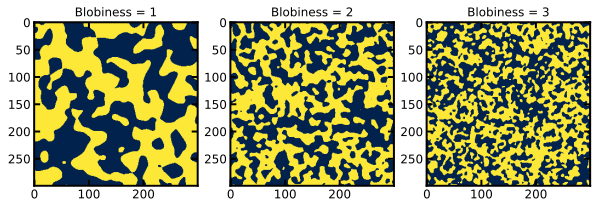

In [8]:
im1 = ps.generators.blobs(shape=[300, 300], porosity=0.5, blobiness=1)
im2 = ps.generators.blobs(shape=[300, 300], porosity=0.5, blobiness=2)
im3 = ps.generators.blobs(shape=[300, 300], porosity=0.5, blobiness=3)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].imshow(im1)
ax[1].imshow(im2)
ax[2].imshow(im3)
ax[0].set_title("Blobiness = 1")
ax[1].set_title("Blobiness = 2")
ax[2].set_title("Blobiness = 3");